In [85]:
from Yolo import Yolo
from TextOCR import Reader
import cv2
from matplotlib import pyplot as plt
import time
import numpy as np
import os

## Initialization

In [86]:
reader = Reader()
yolo = Yolo(weight_path='../yolo_weights/eu_dataset_256_160_extended2_10k/yolov4-tiny.weights', config_path='../yolo_weights/eu_dataset_256_160_extended2_10k/yolov4-tiny.cfg')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Initializing EasyOCR...
EasyOCR initialized.
Initializing super resolution...
Super resolution initialized.
Initializing Yolo...
Using weights: ../yolo_weights/eu_dataset_256_160_extended2_10k/yolov4-tiny.weights
Using config: ../yolo_weights/eu_dataset_256_160_extended2_10k/yolov4-tiny.cfg
Using dims: (256, 160)
Yolo initialized.


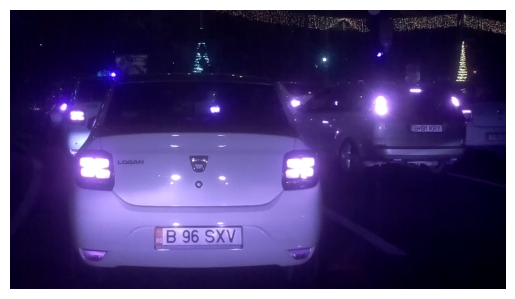

In [87]:
#img = cv2.imread("./eu_dataset/images/dayride_type1_001#t=894.jpg")
# random image from ./eu_dataset/images/
image_name = os.listdir("../eu_dataset/images/")[np.random.randint(0, len(os.listdir("../eu_dataset/images/")))]
img = cv2.imread("../eu_dataset/images/" + image_name)
plt.axis('off')
plt.imshow(img)

## Plate detection with Yolo Tiny v4

In [88]:
t0 = time.time()
bboxes = yolo.find_bboxes(img)
t1 = time.time()

print("Inference time: ", t1-t0)
bboxes

Inference time:  0.04101872444152832


[[378, 552, 218, 56], [1034, 293, 86, 28]]

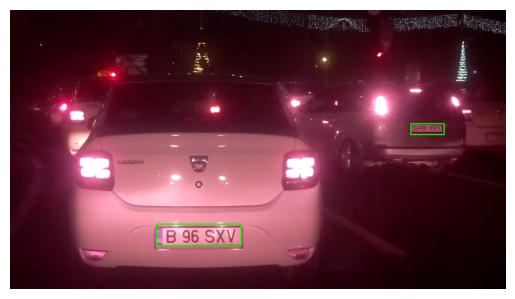

In [89]:
display_img = img.copy()

for box in bboxes:
    x, y, w, h = box
    cv2.rectangle(display_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(display_img[:,:,::-1])
plt.axis('off')
plt.show()

(56, 218, 3)


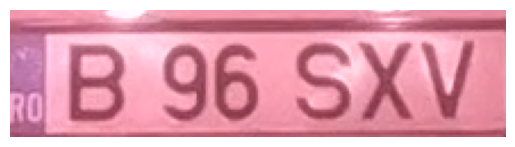

(28, 86, 3)


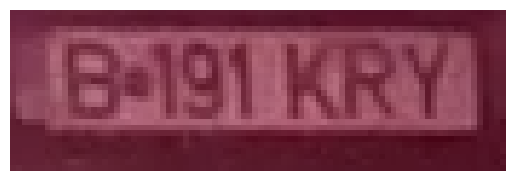

In [90]:
rois = [img[y:y+h, x:x+w] for x, y, w, h in bboxes]

# only show the license plate
for roi in rois:
    plt.imshow(roi[:,:,::-1])
    print(roi.shape)
    plt.axis('off')
    plt.show()

## OCR with EasyOCR

In [91]:
results = []

for roi in rois:
    # if x dimension is less than 100px, skip
    print(roi.shape)
    if roi.shape[1] < 60:
        continue
    t0 = time.time()
    results.append([reader.read(roi), roi])
    t1 = time.time()

    print("Inference time: ", t1-t0)

print("\nPlated read:")

for result in results:
    print(result[0])

(56, 218, 3)
[([[18, 8], [210, 8], [210, 56], [18, 56]], 'B96 SXV', 0.8796882912268151)]
Inference time:  0.1120448112487793
(28, 86, 3)
[([[11, 3], [167, 3], [167, 47], [11, 47]], 'B 1KRY', 0.22682043789350098)]
Inference time:  0.08389806747436523

Plated read:
B96SXV
B1KRY


/tmp/ipykernel_21046/2209918253.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  x, y, w, h = bboxes[rois.index(roi)]


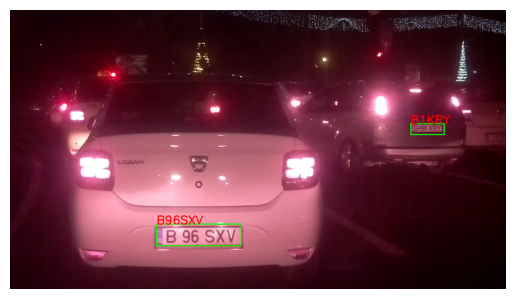

In [92]:
for result, roi in results:
    x, y, w, h = bboxes[rois.index(roi)]
    cv2.putText(display_img, result, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.imshow(display_img[:,:,::-1])
plt.axis('off')
plt.show()